win_loss    L    W
champion          
Androxus  159  186
Ash        93   81
Atlas      49   58
Azaan     105  101
Barik     204  189
Chi-square statistic: 92.70335866286398
P-value: 0.001958040808982013


/var/folders/xy/cqyclf290wl5_mfky_g97nt40000gn/T/ipykernel_10939/945892853.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


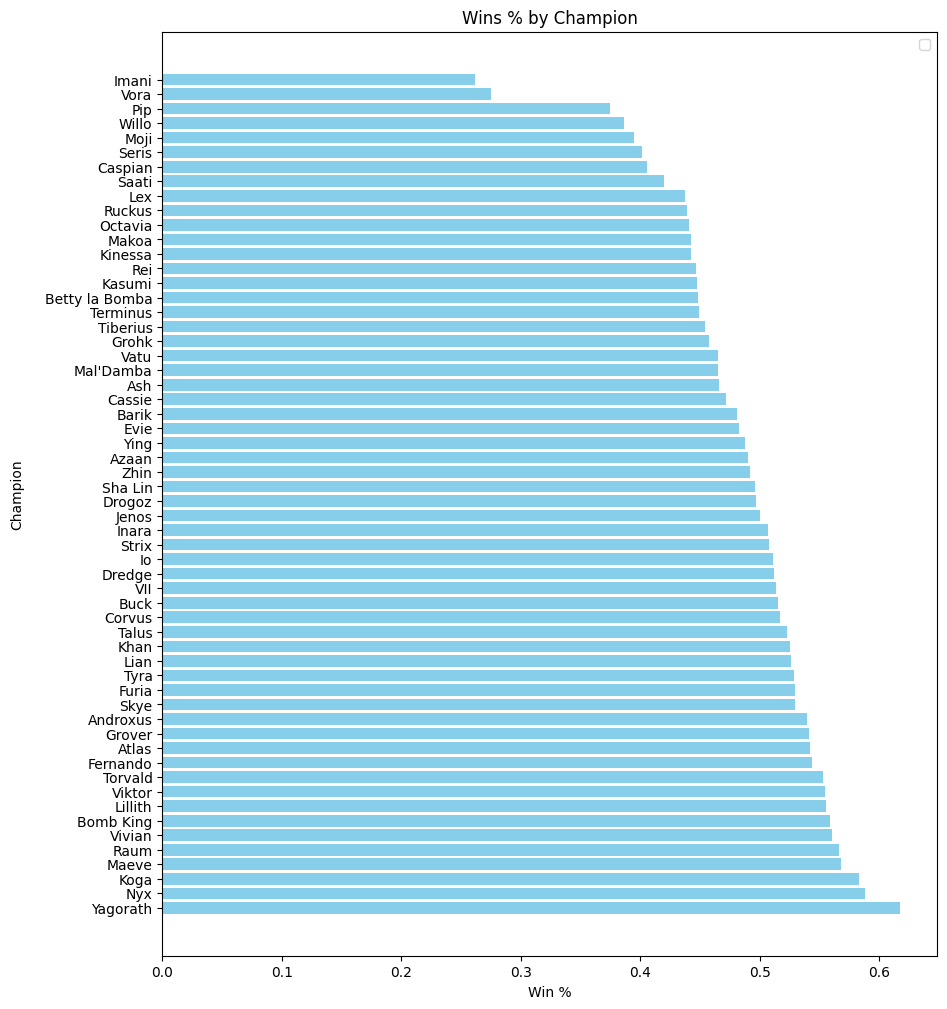

              precision    recall  f1-score   support

        Loss       0.54      0.38      0.45       858
         Win       0.50      0.66      0.57       817

    accuracy                           0.52      1675
   macro avg       0.52      0.52      0.51      1675
weighted avg       0.52      0.52      0.51      1675



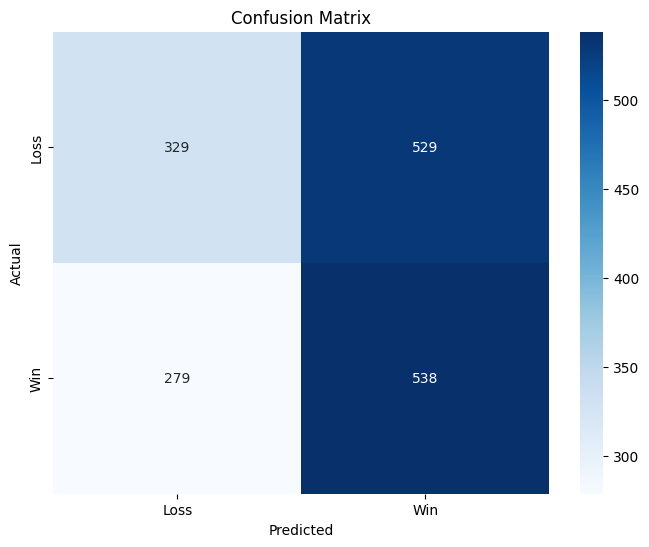

In [55]:
# is there a correlation between the champion you pick and winning match?
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

conn = sq.connect('paladins.db')
df = pd.read_sql_query('select champion, win_loss from player_data', conn)

contingency_table = pd.crosstab(df['champion'], df['win_loss'])
print(contingency_table.head())

chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')


# plot win rates
win_counts = df[df['win_loss'] == 'W'].groupby('champion').size()
total_counts = df.groupby('champion').size()

proportions = win_counts / total_counts
result_df = proportions.reset_index(name='proportion_of_wins')
result_df.columns = ['champion', 'proportion_of_wins']
result_df = result_df.sort_values(by='proportion_of_wins', ascending=False)

plt.figure(figsize=(10, 12))  # Increase height


plt.barh(result_df['champion'], result_df['proportion_of_wins'], color='skyblue')  # Bar chart


plt.xlabel('Win %')
plt.ylabel('Champion', labelpad=15)
plt.title('Wins % by Champion')

plt.legend()
plt.show()


#logistic regression
df_encoded = pd.get_dummies(df, columns = ['champion'], drop_first = True)

X = df_encoded.drop('win_loss', axis=1)
y = df_encoded['win_loss'].apply(lambda x: 0 if x == 'L' else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Loss', 'Win'])
print(report)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [76]:
# predict match best champion to pick
import matplotlib.pyplot as plt
import sqlite3 as sq
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

conn = sq.connect('paladins.db')

df = pd.read_sql_query('select match_id, champion, win_loss from player_data', conn)
maps = pd.read_sql_query('select match_id, map from match', conn)




# start with predicting match outcome given set of information
grouped_df = pd.merge(df, maps, on='match_id', how='left')
grouped_df['win_loss'] = grouped_df['win_loss'].apply(lambda x: 0 if x=='L' else 1)

encoded_df = pd.get_dummies(grouped_df, columns = ['champion', 'map'], drop_first = True)
encoded_df = encoded_df.groupby(['match_id', 'win_loss']).max().reset_index()


X = encoded_df.drop(['win_loss'], axis=1)
y = encoded_df['win_loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))





# then given imputs to model below, rank best picks




#relationship between map champion, and win loss?





contingency_table = pd.crosstab([grouped_df['map'], grouped_df['champion']], grouped_df['win_loss'])


chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
stats.chi

print(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print('looks like there probably is no correlation')







              precision    recall  f1-score   support

           0       0.48      0.52      0.50       164
           1       0.51      0.47      0.49       175

    accuracy                           0.50       339
   macro avg       0.50      0.50      0.50       339
weighted avg       0.50      0.50      0.50       339

[[86 78]
 [93 82]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       164
           1       0.50      0.46      0.48       175

    accuracy                           0.48       339
   macro avg       0.48      0.48      0.48       339
weighted avg       0.48      0.48      0.48       339

[[83 81]
 [95 80]]
win_loss                  0   1
map            champion        
Ascension Peak Androxus  17  15
               Ash       12   7
               Atlas      4   2
               Azaan     11   8
               Barik     19  15
...                      ..  ..
Warder's Gate  Vora       5   1
               Willo

In [50]:
# is there correlation between damage dealt and winning the match?
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sqlite3 as sq
import pandas as pd
import numpy as np

conn = sq.connect('paladins.db')
df = pd.read_sql_query('select total_damage, win_loss from player_data', conn)
X = df[['total_damage']]
df['win'] = df['win_loss'].apply(lambda x: 0 if x == 'L' else 1)
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

#


Logistic Regression Accuracy: 0.551044776119403
